**Loading data from CSV files**

In [22]:
import unicodecsv

## Longer version
enroll = []
f = open('enrollments.csv', 'rb')
reader = unicodecsv.DictReader(f)
# reader here is an iterator and it can be looped only once
for row in reader:
    enroll.append(row)
f.close()
enroll[0]

{u'account_key': u'448',
 u'cancel_date': u'2015-01-14',
 u'days_to_cancel': u'65',
 u'is_canceled': u'True',
 u'is_udacity': u'True',
 u'join_date': u'2014-11-10',
 u'status': u'canceled'}

In [23]:
# Shorter one!
with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enroll = list(reader)
enroll[1]    

{u'account_key': u'448',
 u'cancel_date': u'2014-11-10',
 u'days_to_cancel': u'5',
 u'is_canceled': u'True',
 u'is_udacity': u'True',
 u'join_date': u'2014-11-05',
 u'status': u'canceled'}

In [24]:
## Creating a fuction for reading in files.
def read_csv(filename):
    with open(filename,'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)
# Reading in data using the function    
enroll = read_csv('enrollments.csv')
engage = read_csv('daily_engagement.csv')
submission = read_csv('project_submissions.csv')
print enroll[0]
type(enroll[0])

{u'status': u'canceled', u'is_udacity': u'True', u'is_canceled': u'True', u'join_date': u'2014-11-10', u'account_key': u'448', u'cancel_date': u'2015-01-14', u'days_to_cancel': u'65'}


dict

**Fixing Data Types**

In [25]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None

def parse_date(date1):
    if date1 == '':
        return None
    else:
        return dt.strptime(date1, '%Y-%m-%d')

# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enroll:
    #print type(enrollment['cancel_date'])
    #print type(enrollment['days_t0_cancel'])
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enroll[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [26]:
# Clean up the data types in the engagement table
for engagement_record in engage:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
engage[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [27]:
# Clean up the data types in the submissions table
for s in submission:
    s['completion_date'] = parse_date(s['completion_date'])
    s['creation_date'] = parse_date(s['creation_date'])

submission[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

**Investigating the Data**

In [28]:
# This is actually one of the "Problems In Data""
# but this is required to be executed here to
# avoid errors.
# It will run only once!
for e in engage:
    e['account_key'] = e['acct']
    del(e['acct'])

In [29]:
## Counting the number of unique entries/students in data.
unique_enroll = set()
for e in enroll:
    unique_enroll.add(e['account_key'])
len(unique_enroll)    

1302

In [30]:
# Defining a function for the same.
def length(some_list):
    print "Original length"
    print len(some_list)
    
    unique_list = set()
    
    print "Unique length"
    for l in some_list:
        unique_list.add(l['account_key'])
    print len(unique_list)
    return unique_list

In [31]:
length(enroll)

Original length
1640
Unique length
1302


{u'199',
 u'593',
 u'1200',
 u'1175',
 u'1269',
 u'1268',
 u'1256',
 u'669',
 u'1257',
 u'1145',
 u'818',
 u'345',
 u'346',
 u'347',
 u'340',
 u'341',
 u'342',
 u'343',
 u'810',
 u'919',
 u'812',
 u'813',
 u'348',
 u'349',
 u'816',
 u'817',
 u'737',
 u'719',
 u'718',
 u'717',
 u'716',
 u'6',
 u'426',
 u'713',
 u'712',
 u'711',
 u'710',
 u'915',
 u'661',
 u'914',
 u'660',
 u'1089',
 u'1069',
 u'1068',
 u'422',
 u'1182',
 u'1061',
 u'1060',
 u'1168',
 u'1062',
 u'1065',
 u'1064',
 u'619',
 u'1066',
 u'427',
 u'298',
 u'299',
 u'296',
 u'297',
 u'294',
 u'295',
 u'292',
 u'293',
 u'290',
 u'291',
 u'1128',
 u'590',
 u'1085',
 u'592',
 u'1083',
 u'198',
 u'597',
 u'596',
 u'195',
 u'1121',
 u'197',
 u'1123',
 u'1124',
 u'1139',
 u'193',
 u'1127',
 u'270',
 u'271',
 u'714',
 u'273',
 u'274',
 u'275',
 u'276',
 u'277',
 u'278',
 u'279',
 u'569',
 u'497',
 u'344',
 u'910',
 u'1067',
 u'524',
 u'525',
 u'526',
 u'527',
 u'520',
 u'1019',
 u'522',
 u'523',
 u'1014',
 u'1015',
 u'599',
 u'1017',

In [32]:
length(submission)

Original length
3642
Unique length
743


{u'0',
 u'1',
 u'10',
 u'100',
 u'1000',
 u'1002',
 u'101',
 u'1013',
 u'1014',
 u'102',
 u'103',
 u'1033',
 u'104',
 u'1048',
 u'105',
 u'1056',
 u'1058',
 u'106',
 u'107',
 u'1070',
 u'1073',
 u'108',
 u'1081',
 u'1087',
 u'109',
 u'1098',
 u'11',
 u'110',
 u'111',
 u'1110',
 u'1111',
 u'1116',
 u'112',
 u'113',
 u'1131',
 u'1133',
 u'1139',
 u'114',
 u'1143',
 u'115',
 u'1150',
 u'1154',
 u'116',
 u'1169',
 u'117',
 u'1173',
 u'1176',
 u'118',
 u'1183',
 u'1185',
 u'119',
 u'12',
 u'120',
 u'1206',
 u'1209',
 u'121',
 u'1215',
 u'1216',
 u'1217',
 u'122',
 u'1224',
 u'123',
 u'1231',
 u'1235',
 u'124',
 u'1247',
 u'125',
 u'126',
 u'1263',
 u'127',
 u'1274',
 u'1279',
 u'128',
 u'129',
 u'1292',
 u'1298',
 u'13',
 u'130',
 u'131',
 u'132',
 u'133',
 u'134',
 u'135',
 u'136',
 u'137',
 u'138',
 u'139',
 u'14',
 u'140',
 u'141',
 u'142',
 u'143',
 u'144',
 u'145',
 u'146',
 u'147',
 u'148',
 u'149',
 u'15',
 u'150',
 u'151',
 u'152',
 u'153',
 u'154',
 u'155',
 u'156',
 u'157',
 u'158

In [33]:
unique_engage = length(engage)

Original length
136240
Unique length
1237


In [34]:
engage[300]['account_key']

u'1'

**Missing Engagement Records**

In [35]:
## Find any one student enrollments where the student is 
## missing from the daily engagement table.
## Output that enrollment.
for e in enroll:
    student = e['account_key']
    if student not in unique_engage:
        print e
        break

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}


**Checking for More Problem Records**

In [36]:
## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.
count = 0
for e in enroll:
    if e['days_to_cancel'] != 0:
        student = e['account_key']
        if student not in unique_engage:
            count += 1
            print e
    
count           

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}


3

**Tracking Down the Remaining Problems**

In [37]:
## Udacity test accounts aren't guaranteed to be present
## in daily_engagement table.

# Create a set of the account keys for all Udacity test accounts
test_acc = set()
for e in enroll:
    if e['is_udacity']:
        test_acc.add(e['account_key'])
len(test_acc)        

6

In [38]:
# Given some data with an account_key field, removes any records 
# corresponding to Udacity test accounts
## Function for same!
def remove_test_acc(data):
    non_test_data = []
    for d in data:
        if d['account_key'] not in test_acc:
            non_test_data.append(d)
    return non_test_data        

In [39]:
## Removing Udacity test accounts from all 3 tables.
non_enroll = remove_test_acc(enroll)
non_engage = remove_test_acc(engage)
non_submission = remove_test_acc(submission)

print len(non_engage)
print len(non_enroll)
print len(non_submission)

135656
1622
3634


**Refining the Question**

In [40]:
## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}
for e in non_enroll:
    if not e['is_canceled'] or e['days_to_cancel'] > 7:
        account_key = e['account_key']
        value = e['join_date']
        paid_students[account_key] = value
        ## Any student can enroll multiple times. The above code will
        ## thus store any arbitrary join_date of a student from an 
        ## arbitrary enrollment.
        ## To fix that:
        if account_key not in paid_students or value > paid_students[account_key]:
            paid_students[account_key] = value
len(paid_students)

995

**Getting Data from First Week**

In [41]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time = engagement_date - join_date
    return time.days < 7 and time.days >= 0

In [42]:
## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.


In [43]:
# Remove anyone who cancelled within first week
def remove_free_trials(data):
    new_data = []
    for d in data:
        if d['account_key'] in paid_students:
            new_data.append(d)
    return new_data        

In [56]:
paid_enroll = remove_free_trials(non_enroll)
paid_engage = remove_free_trials(non_engage)
paid_submission = remove_free_trials(non_submission)
print len(paid_enroll)
print len(paid_engage)
print len(paid_submission)

1293
134549
3618


In [58]:
## Created a new field in paid_engage for the part
## no of visits in first week
for e in paid_engage:
    if e['num_courses_visited'] > 0:
        e['has_visited'] = 1
    else:
        e['has_visited'] = 0

In [59]:
paid_engage_in_first_week = []
for e in paid_engage:
    account_key = e['account_key']
    join_date = paid_students[account_key]
    engagement_date = e['utc_date']
    
    if within_one_week(join_date, engagement_date):
        paid_engage_in_first_week.append(e)
len(paid_engage_in_first_week)    

6920

**Exploring Student Engagement**

In [60]:
##Finding Average Minutes Spent In Classroom

In [61]:
## Creating a dictionary that maps account keys to list
## of engagement records
from collections import defaultdict

engagement_by_account = defaultdict(list)
for e in paid_engage_in_first_week:
    account_key = e['account_key']
    engagement_by_account[account_key].append(e)

In [62]:
## Calculating total minutes
## Creating a dictionary that maps account keys to 
## total minutes spent by them.
total_min_by_acc = {}
for account_key, engagement_by_student in engagement_by_account.items():
    total_min = 0
    for e in engagement_by_student:
        total_min += e['total_minutes_visited']
    total_min_by_acc[account_key] = total_min    


In [63]:
total_min = total_min_by_acc.values()
import numpy as np
print np.mean(total_min)
print np.std(total_min)
print np.min(total_min)
print np.max(total_min)

305.414718908
405.91261032
0.0
3564.7332645


In [64]:
## Max no of minutes come out to be more than that in a week.
## Let's investigate!
## First we'll try to find the student with max minutes.

student_max_min = None
max_min = 0
for account_key , total_min in total_min_by_acc.items():
    if total_min > max_min:
        max_min = total_min
        student_max_min = account_key
max_min

3564.7332644989997

In [65]:
## Now we have the account key of the student with max
## engagement, let's print his engagement records!
for e, record in engagement_by_account.items():
    if e == student_max_min:
        print record

[{u'lessons_completed': 4, u'num_courses_visited': 4, 'has_visited': 1, u'total_minutes_visited': 850.519339666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}, {u'lessons_completed': 6, u'num_courses_visited': 6, 'has_visited': 1, u'total_minutes_visited': 872.633923334, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}, {u'lessons_completed': 6, u'num_courses_visited': 2, 'has_visited': 1, u'total_minutes_visited': 777.018903666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}, {u'lessons_completed': 2, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 294.568774, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}, {u'lessons_completed': 1, u'num_courses_visited': 3, 'has_visited': 1, u'total_minutes_visited': 471.2139785, u'projects_completed': 0, 'account_key': 

**Lessons Completed in First Week**

In [66]:
## Analyzing Lessons completed.
from collections import defaultdict
def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

In [67]:
def analyze_a_column(column_name):
    total_dict = {}
    for key, record in engagement_by_account.items():
        total = 0
        for r in record:
            total += r[column_name]
        total_dict[key]= total  
    return total_dict

a = analyze_a_column('lessons_completed')

In [142]:
## Function to describe data
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def describe_data(data):
    print "Mean", np.mean(data)
    print "Standard Deviation", np.std(data)
    print "Minimum", np.min(data)
    print "Maximum", np.max(data)
    plt.hist(data)

In [69]:
describe_data(a.values())

Mean 1.63216080402
Standard Deviation 3.00140182563
Minimum 0
Maximum 36


**No of Visits In First Week**

In [72]:
## For this we created a new column called "has_visited"
## that stored either 0 or 1 depending on whether a student
## visited the course or not
b = analyze_a_column('has_visited')
describe_data(b.values())

Mean 2.91256281407
Standard Deviation 2.22037005491
Minimum 0
Maximum 7


**Spliting out Passing Students**

In [100]:
subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()
for e in paid_submission:
    if e['assigned_rating'] == 'PASSED'or e['assigned_rating'] == 'DISINCTION':
        if e['lesson_key'] in subway_project_lesson_keys: 
            pass_subway_project.add(e['account_key'])
len(pass_subway_project)

637

In [106]:
pass_engage = []
non_pass_engage = []
for e in paid_engage_in_first_week:
    if e['account_key'] in pass_subway_project:
        pass_engage.append(e)
    else:
        non_pass_engage.append(e)
print len(pass_engage)
print len(non_pass_engage)

4458
2462


6920

**Comparing Two Student Groups**

In [116]:
pass_engage_by_acc = group_data(pass_engage, 'account_key')
non_pass_engage_by_acc = group_data(non_pass_engage, 'account_key')

def analyze_a_column2(dic, column_name):
    total_dict = {}
    for key, record in dic.items():
        total = 0
        for r in record:
            total += r[column_name]
        total_dict[key]= total  
    return total_dict

a = analyze_a_column2(pass_engage_by_acc, 'total_minutes_visited')
b = analyze_a_column2(non_pass_engage_by_acc, 'total_minutes_visited')
print 'Passing students'
describe_data(a.values())
print 'Non passing students'
describe_data(b.values())

Passing students
Mean 389.946219162
Standard Deviation 440.398841352
Minimum 0.0
Maximum 3564.7332645
Non passing students
Mean 155.005317619
Standard Deviation 278.381121435
Minimum 0.0
Maximum 1768.52274933


In [118]:
c = analyze_a_column2(pass_engage_by_acc, 'lessons_completed')
d = analyze_a_column2(non_pass_engage_by_acc, 'lessons_completed')
print 'Passing students'
describe_data(c.values())
print 'Non passing students'
describe_data(d.values())

Passing students
Mean 2.04395604396
Standard Deviation 3.15302282779
Minimum 0
Maximum 36
Non passing students
Mean 0.899441340782
Standard Deviation 2.55136062302
Minimum 0
Maximum 27


In [119]:
e = analyze_a_column2(pass_engage_by_acc, 'has_visited')
f = analyze_a_column2(non_pass_engage_by_acc, 'has_visited')
print 'Passing students'
describe_data(e.values())
print 'Non passing students'
describe_data(f.values())

Passing students
Mean 3.42229199372
Standard Deviation 2.21079251355
Minimum 0
Maximum 7
Non passing students
Mean 2.00558659218
Standard Deviation 1.92889584505
Minimum 0
Maximum 7


In [135]:
other_proj_comp_pass_engage = [] 
for s in paid_submission:
    if s['account_key'] in pass_engage_by_acc.keys():
        if (s['assigned_rating'] == 'PASSED' or s['assigned_rating'] == 'DISTINCTION') \
                                                and s['lesson_key'] not in subway_project_lesson_keys:
            other_proj_comp_pass_engage.append(s)
len(other_proj_comp_pass_engage)

917

In [134]:
other_proj_comp_non_pass_engage = [] 
for s in paid_submission:
    if s['account_key'] in non_pass_engage_by_acc.keys():
        if (s['assigned_rating'] == 'PASSED' or s['assigned_rating'] == 'DISTINCTION') \
                                               and s['lesson_key'] not in subway_project_lesson_keys:
            other_proj_comp_non_pass_engage.append(s)
len(other_proj_comp_non_pass_engage) 

85

In [136]:
from collections import defaultdict
def group_data2(data, key_name, value_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point[value_name])
    return grouped_data
group_data2(other_proj_comp_pass_engage, 'account_key', 'lesson_key')
group_data2(other_proj_comp_non_pass_engage, 'account_key', 'lesson_key')

defaultdict(list,
            {u'1000': [u'4576183932'],
             u'1014': [u'4576183932', u'4582204201'],
             u'1056': [u'4576183932'],
             u'1058': [u'4582204201'],
             u'106': [u'3168208620', u'3165188753'],
             u'1070': [u'4576183932'],
             u'1087': [u'4576183932', u'4582204201'],
             u'1098': [u'3174288624', u'3168208620'],
             u'1110': [u'4576183932'],
             u'1131': [u'4582204201', u'4576183932'],
             u'1143': [u'4582204201', u'4576183932'],
             u'1150': [u'4582204201', u'4576183932'],
             u'1176': [u'4582204201', u'4576183932'],
             u'1183': [u'4582204201', u'4576183932'],
             u'1209': [u'4576183932'],
             u'1216': [u'4576183932'],
             u'1217': [u'4582204201', u'4576183932'],
             u'1224': [u'4576183932'],
             u'1231': [u'4576183932', u'4582204201'],
             u'1235': [u'4576183932'],
             u'1263': [u'4576183932'],

**Making Histograms**

Text(0.5,0,u'Total minutes spent')

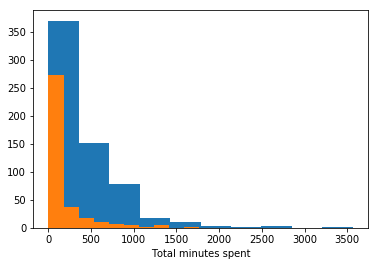

In [155]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(a.values())
plt.hist(b.values())
plt.xlabel('Total minutes spent')

Text(0.5,0,u'No of lessons completed')

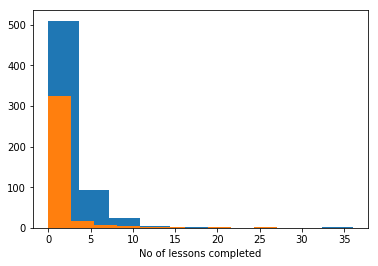

In [154]:
plt.hist(c.values())
plt.hist(d.values())
plt.xlabel('No of lessons completed')

Text(0.5,0,u'Number of days')

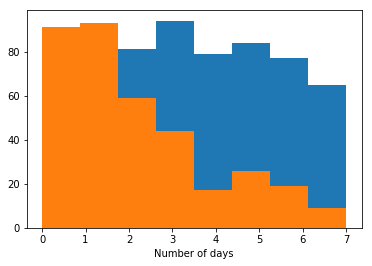

In [153]:
plt.hist(e.values(), bins =8)
plt.hist(f.values(), bins =8)
plt.xlabel('Number of days')